In [1]:
from pulsar_analysis import pulsar_analysis
from generic_plotting import *
#%autoreload 1

In [2]:
# Initialize and run the analysis
long_data = "./Data4Analysis/ch00_B0833-45_20150612_191438_010_4.txt"
short_data = "/home/ashwin-ubuntu/GIT/Vela_Data_analysis/Analysis/vela_chunks/chunk_0001.txt"

vela = pulsar_analysis(long_data, channel_names=["N", "S"], data_type='ascii')
vela.compute_intensity_matrix()

Given Data is of ndim : 2 . shape : 2
file_path: ./Data4Analysis/ch00_B0833-45_20150612_191438_010_4.txt
data_type: ascii
n_channels: 2
raw_data shape :  (30720000, 2)
channel_names: ['N', 'S']
block_size: 512
avg_blocks: 60
sample_rate: 33000000.0
intensity_matrix_ch_s shape :  (2,)
dedispersed_ch_s shape :  (2,)
dedispersed_choped_ch_s: [None None]
folded_ch_s: [None None]
center_freq_MHZ: 326.5
bandwidth_MHZ: 16.5
pulseperiod_ms: None
dedispersion_measure: None


/home/ashwin/Documents/GIT/PulsarAnalytics/generic_plotting.py:331: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


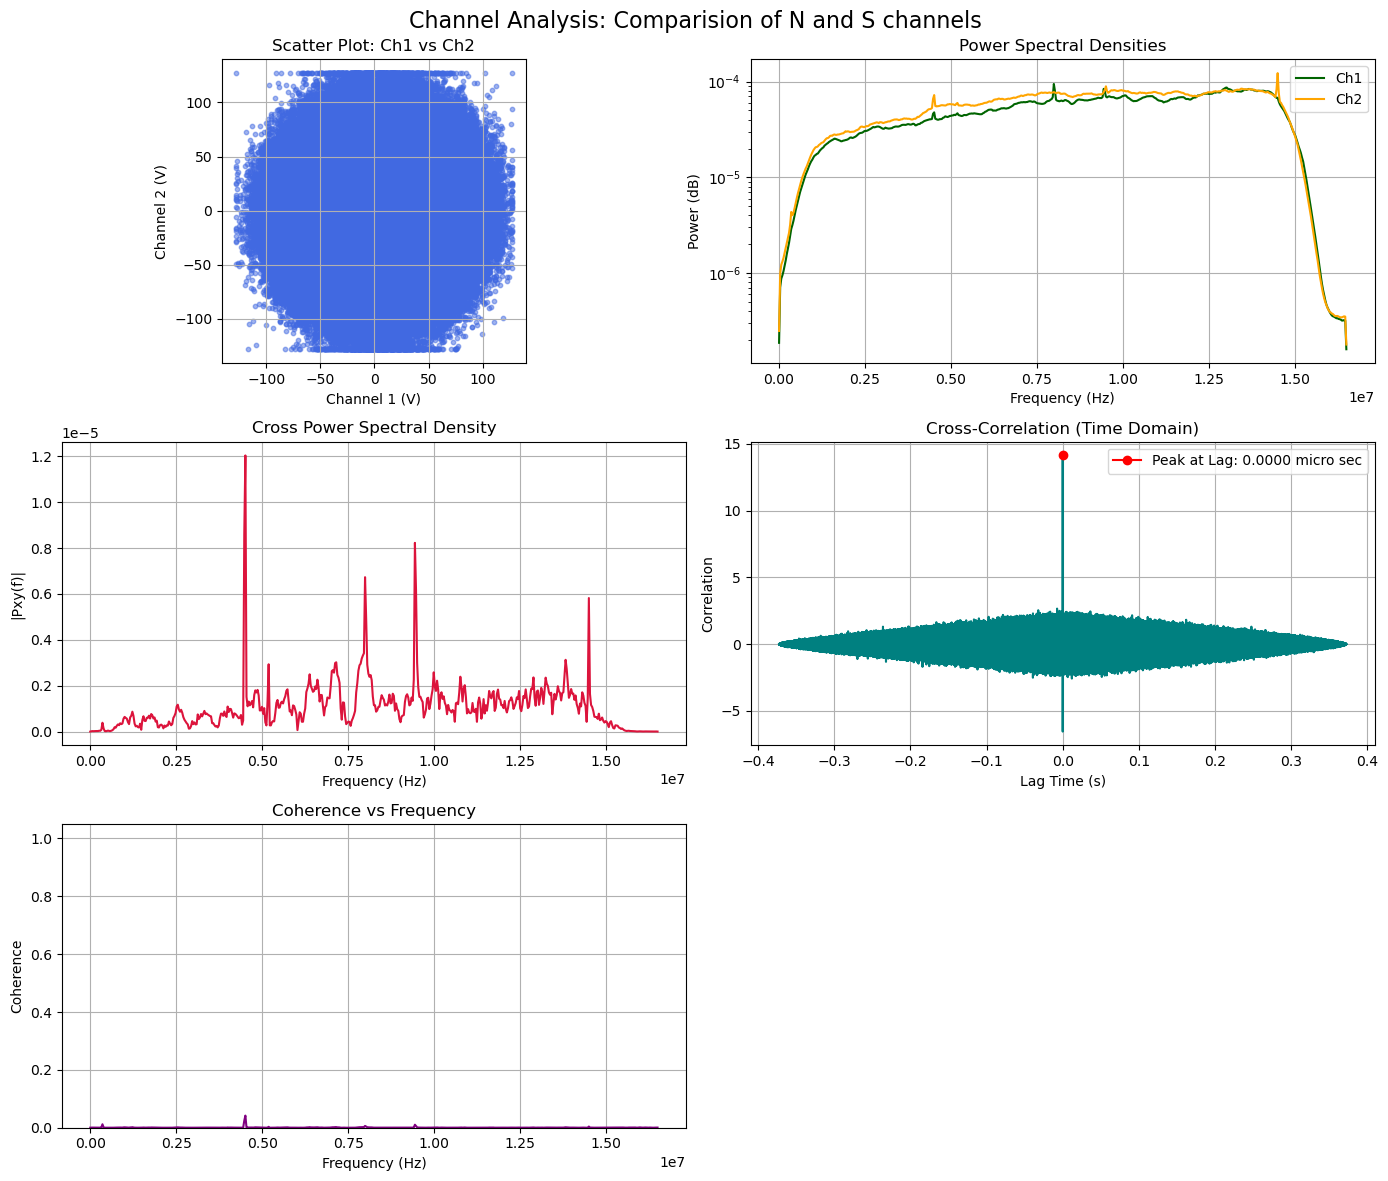

In [3]:
percentofData = 40 # Percentage of data to analyze
n = int(vela.raw_data.shape[0] * percentofData / 100)

ch0 = vela.raw_data[:n , 0]
ch1 = vela.raw_data[:n, 1]
fs = vela.sample_rate

compare_channels(ch0,ch1, fs, label="Comparision of N and S channels",)

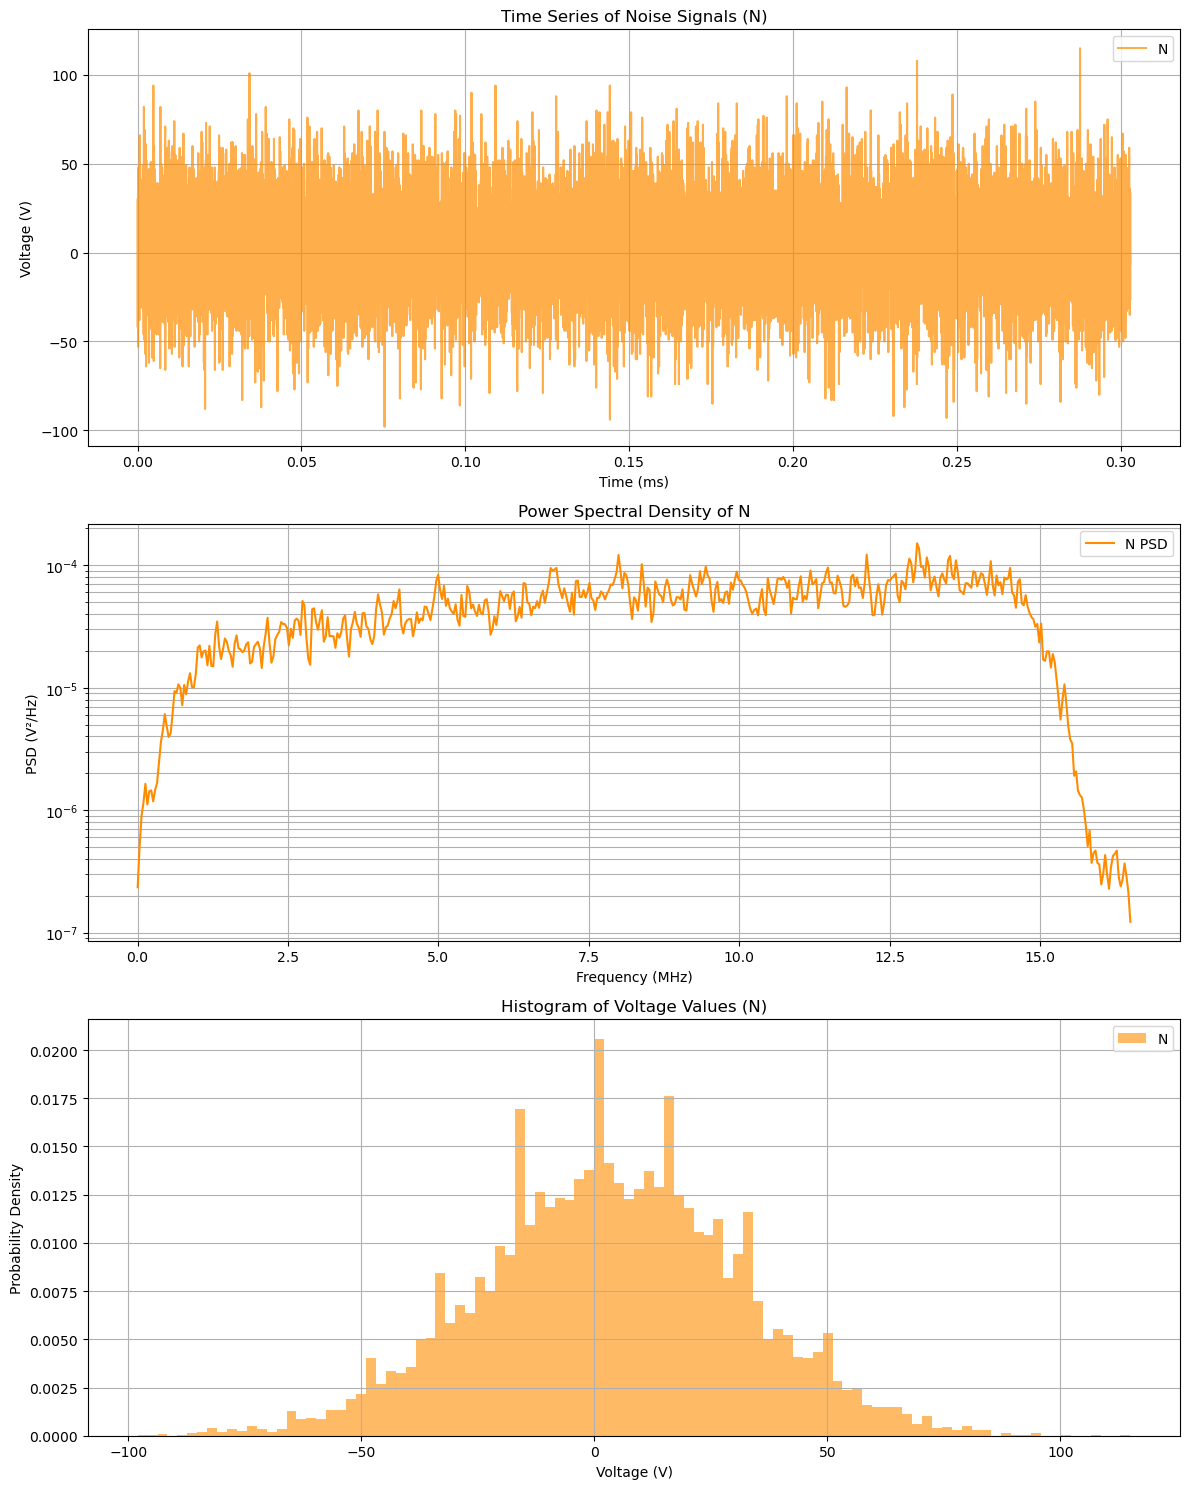

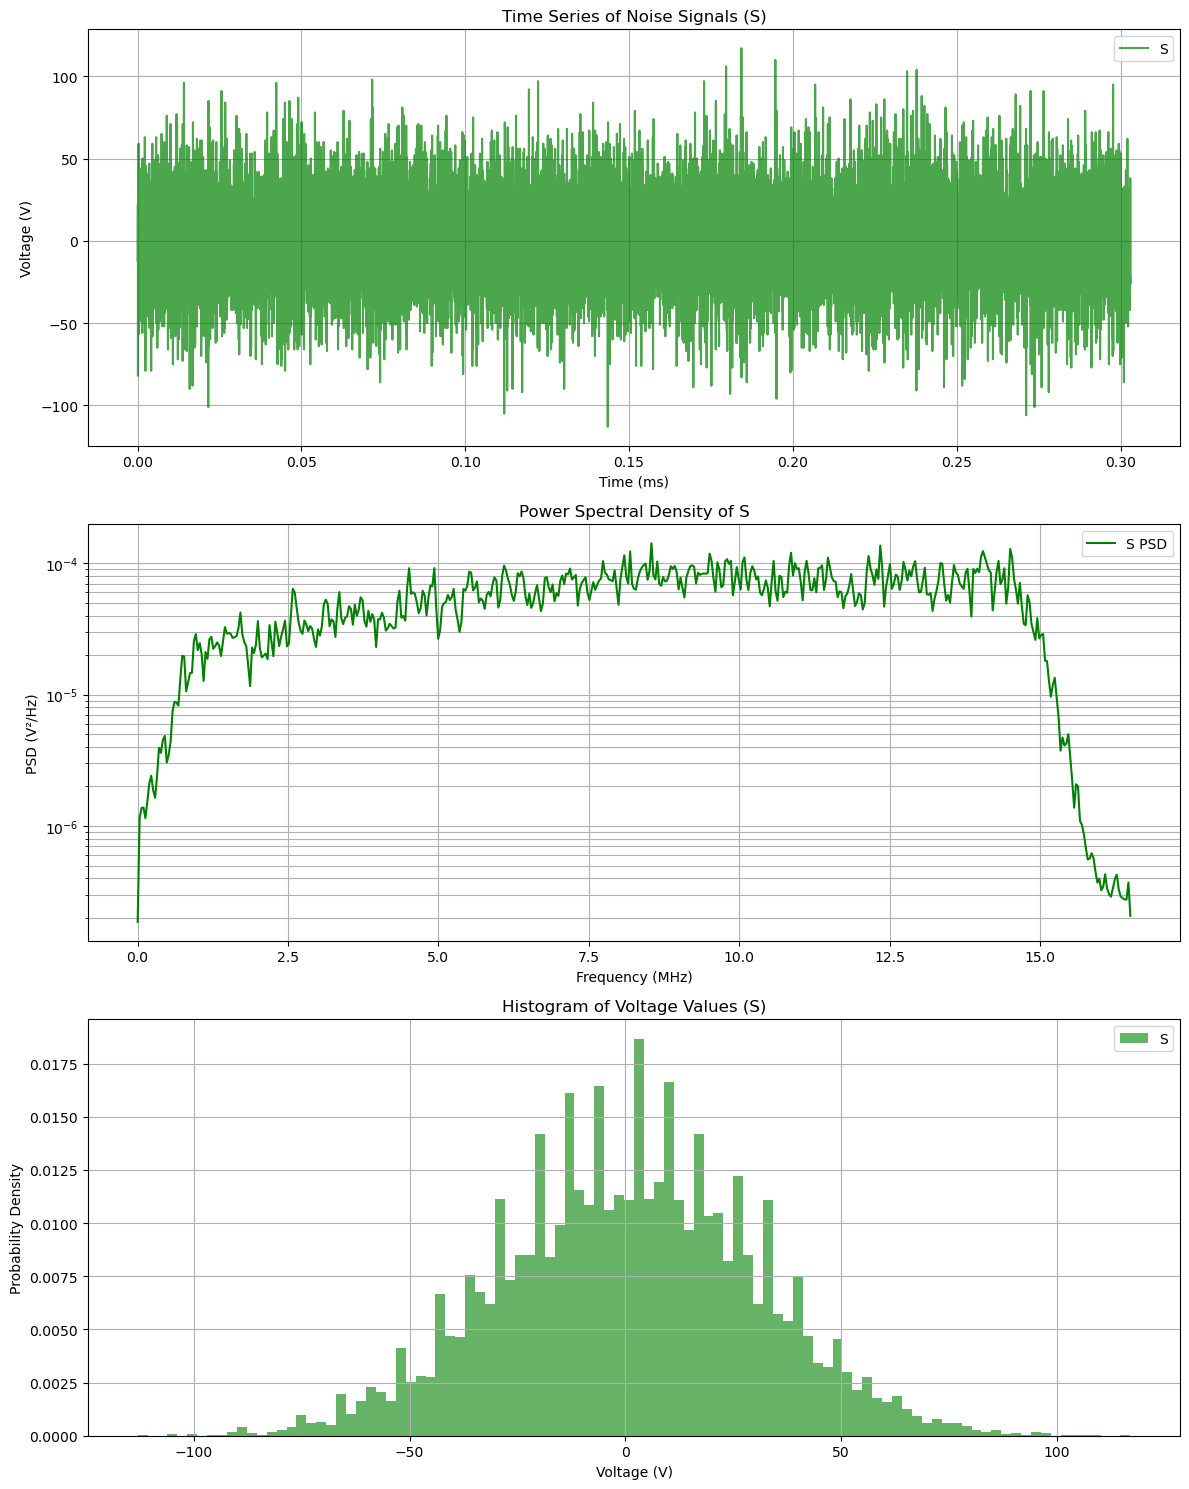

In [4]:
Plot_characterstics(vela,channel=0)
Plot_characterstics(vela,channel=1)

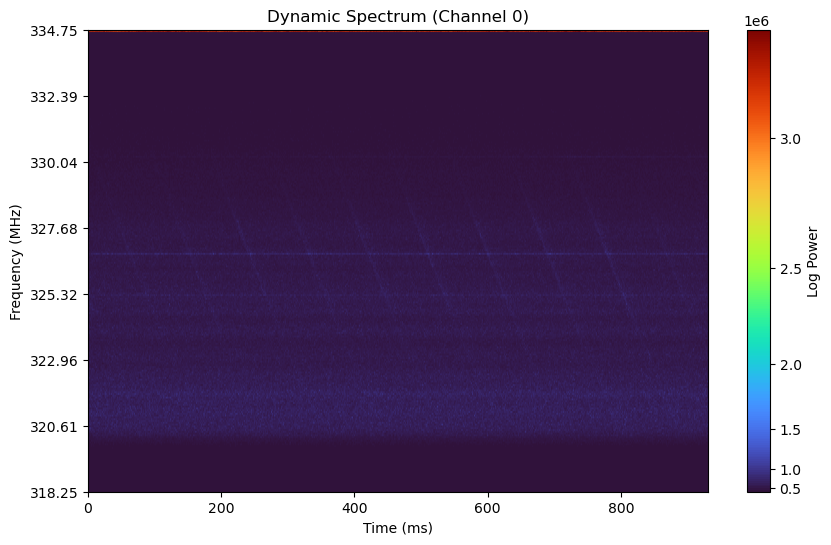

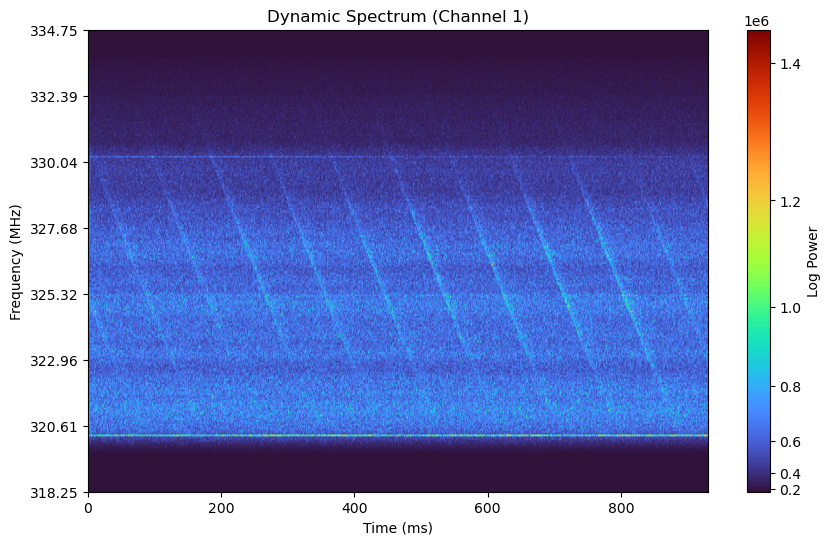

In [5]:
plot_intensity_matrix(vela,channel = 0)

plot_intensity_matrix(vela,channel = 1)


Top 3 peak positions (ms): [ 88.43636364 177.80363636 269.03272727]


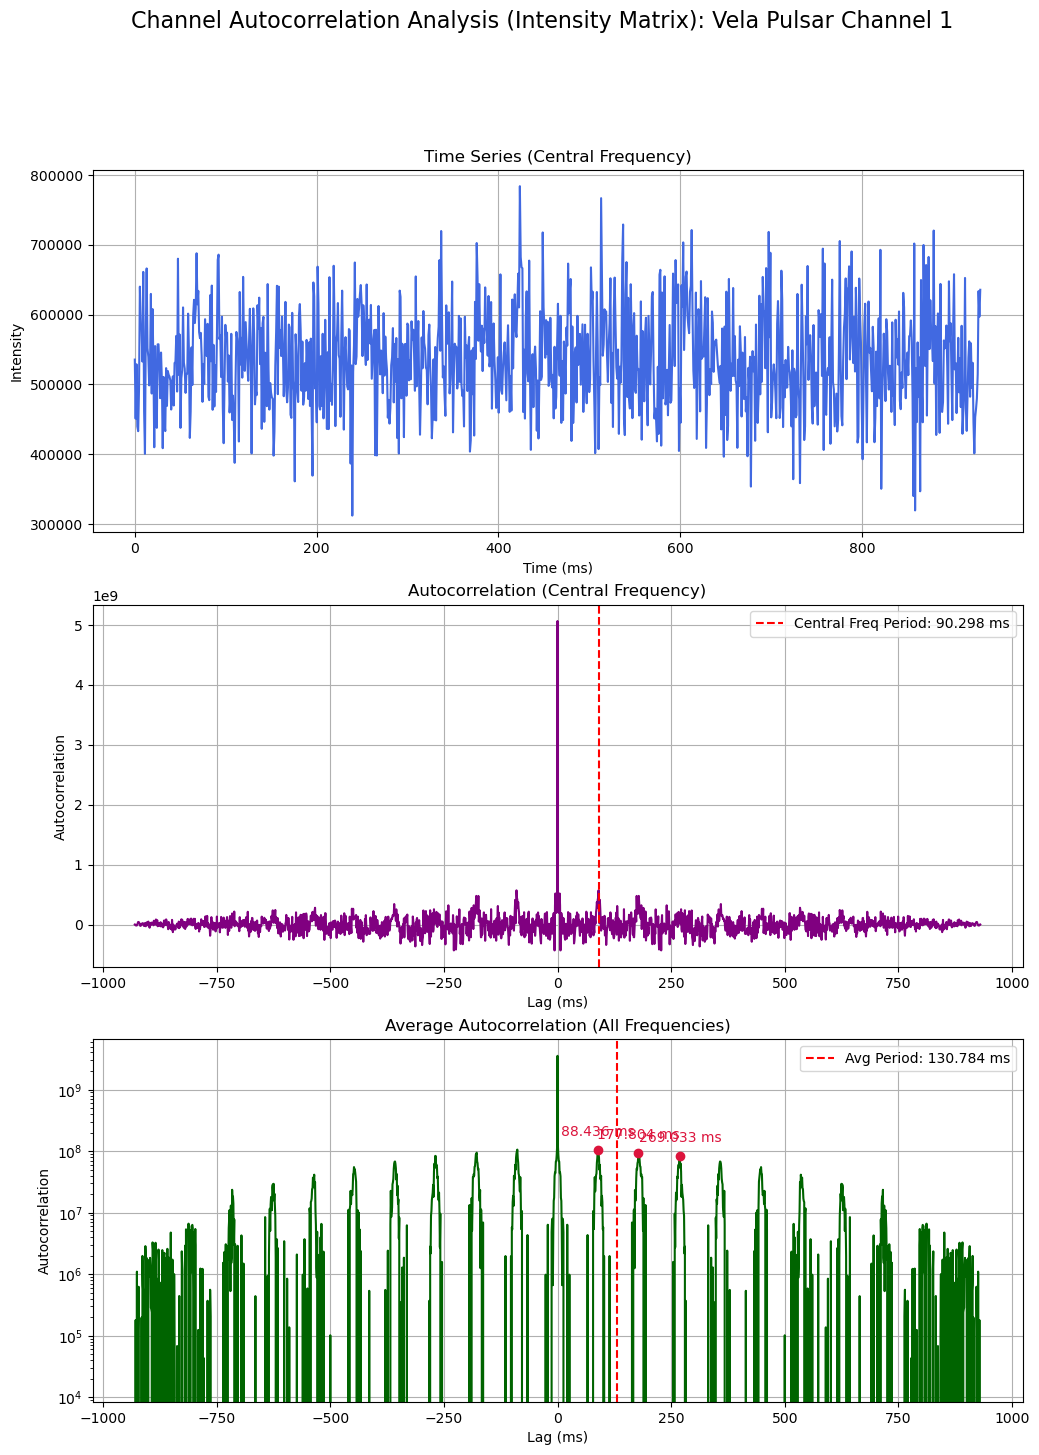

Top 3 peak positions (ms): [ 89.36727273 179.66545455 269.03272727]


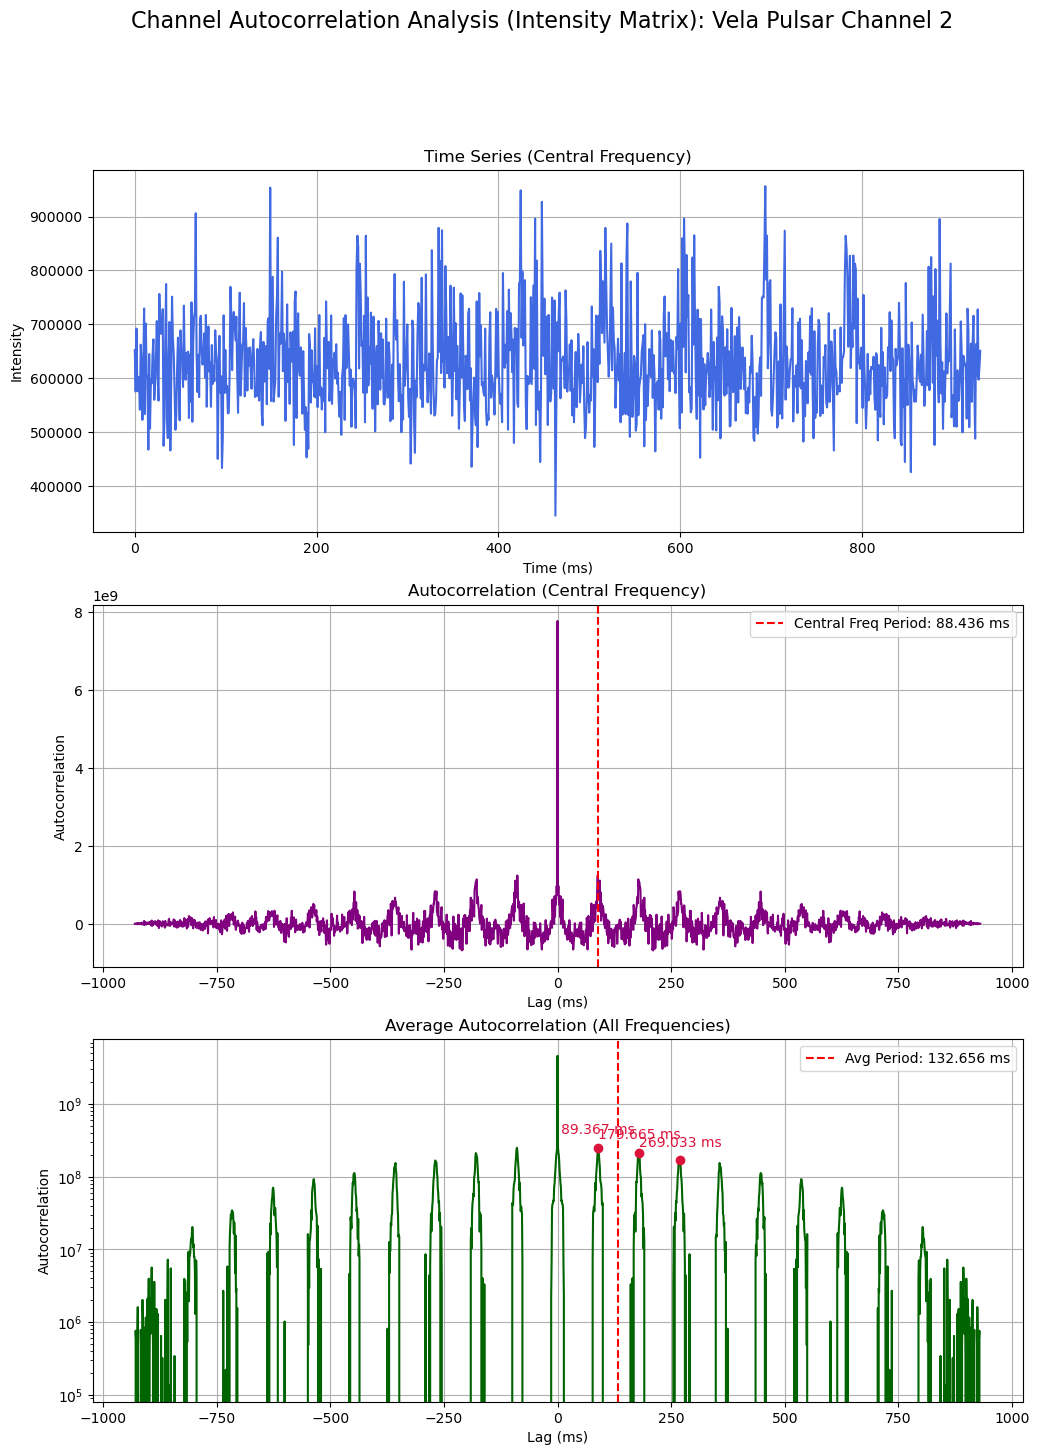

In [6]:
analyze_autocorrelation(vela,channel=0, label="Vela Pulsar Channel 1")
analyze_autocorrelation(vela,channel=1, label="Vela Pulsar Channel 2")


In [7]:
# Set pulsar Period
vela.pulseperiod_ms = 89.3673

Gaussian fit maximum at DM = 69.64629, Score = 1707220.70238


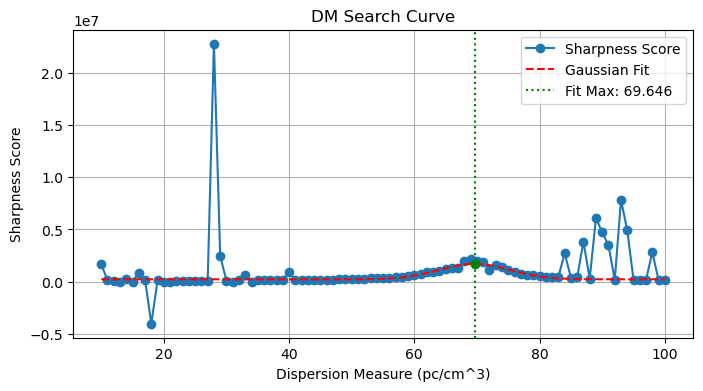

Gaussian fit maximum at DM = 69.78714, Score = 2907723.19677


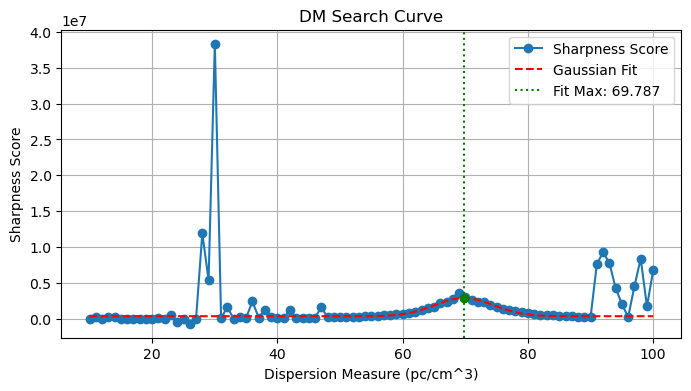

In [8]:
channel = 0
num_peaks = 10
to_plot = False
dm_min = 10.0
dm_max = 100.0
tol = 1

score = vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)
plot_dm_curve(np.array(score)[:,0], np.array(score)[:,1])

channel = 1
score = vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)
plot_dm_curve(np.array(score)[:,0], np.array(score)[:,1])


Gaussian fit maximum at DM = 69.66648, Score = 1960737.77019


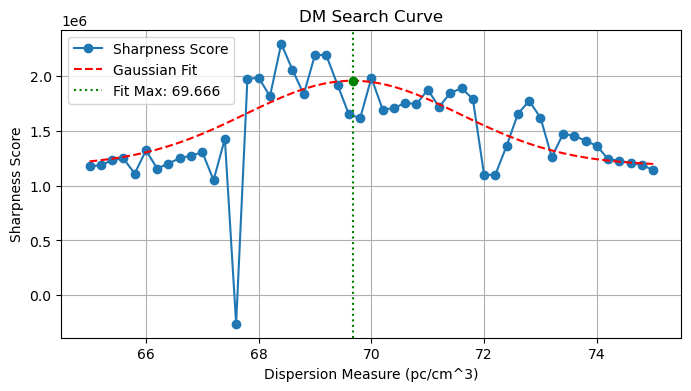

Gaussian fit maximum at DM = 69.74988, Score = 3052721.87549


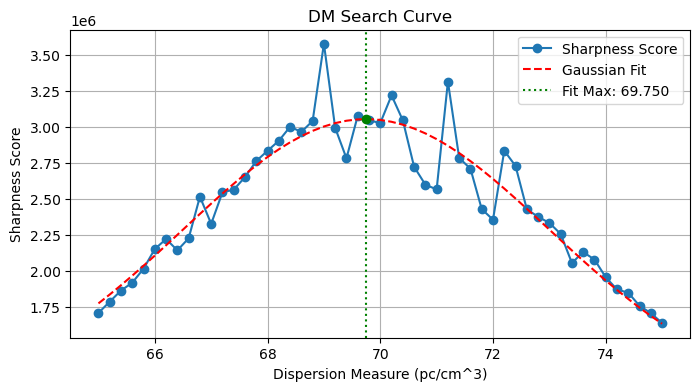

In [9]:
channel = 0
num_peaks = 10
to_plot = False
dm_min = 65.0
dm_max = 75.0
tol = 0.2

score = vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)
plot_dm_curve(np.array(score)[:,0], np.array(score)[:,1])

channel = 1
score = vela.Auto_dedisperse(channel,num_peaks,to_plot,dm_min, dm_max,tol = tol)
plot_dm_curve(np.array(score)[:,0], np.array(score)[:,1])


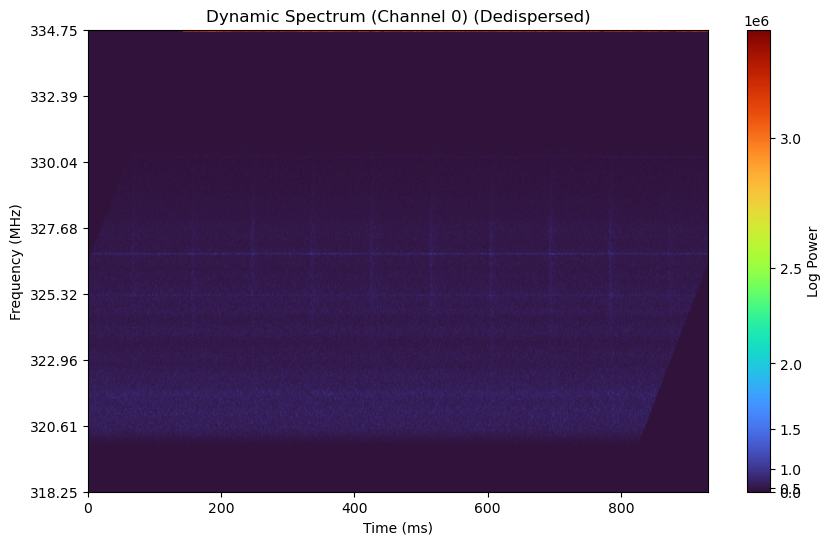

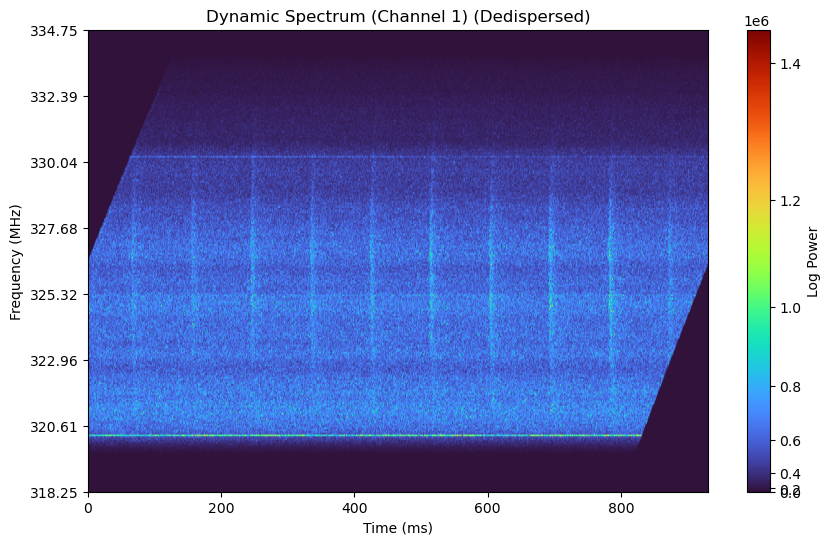

In [10]:
# give integer for a single channel or String "all" for all channels
vela.dedispersion_measure = 69.750

best_DM = vela.dedispersion_measure
channel = 0

vela.Manual_dedisperse(DM=best_DM, channel="all")
plot_intensity_matrix(vela,channel ,dedispersed=True)

channel = 1
plot_intensity_matrix(vela,channel,dedispersed=True)

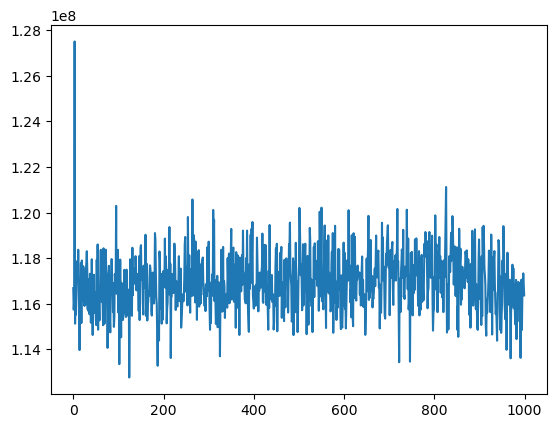

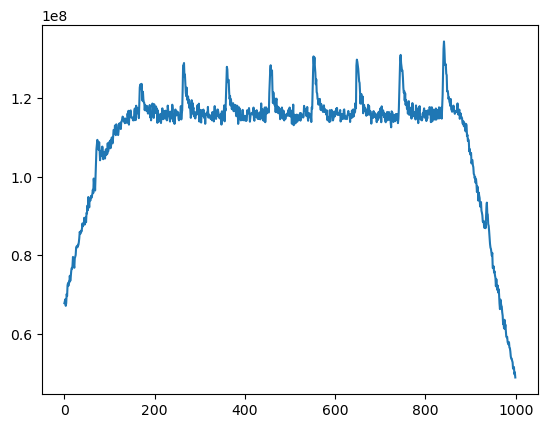

In [11]:
# folding

channel = 1
profile = vela.intensity_matrix_ch_s[channel].sum(axis=1)
plt.plot(profile, label="channel 1")
plt.show()

profile = vela.dedispersed_ch_s[channel].sum(axis=1)
plt.plot(profile, label="channel 1" )
plt.show()



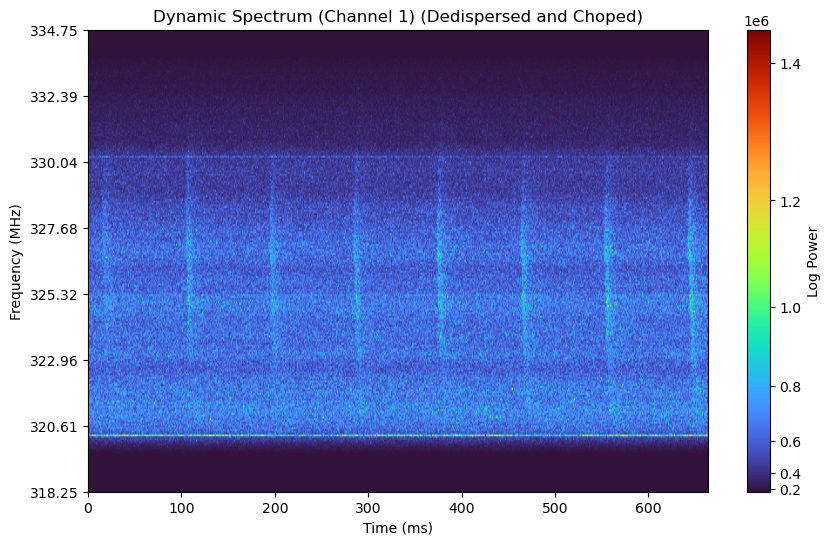

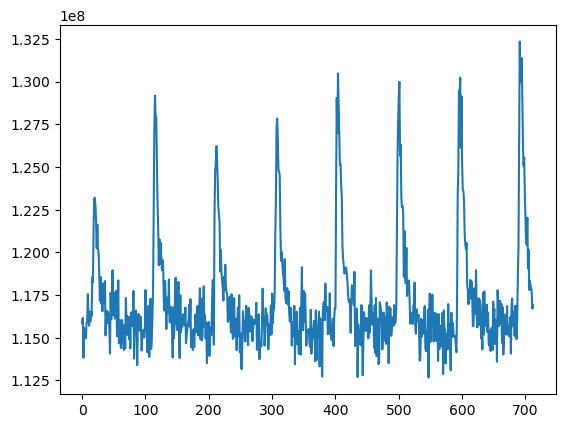

In [12]:

# matrix = vela.intensity_matrix_ch_s[1]
block_size = vela.block_size
avg_blocks = vela.avg_blocks
sample_rate = vela.sample_rate
DM = 68 # Vela DM

channel= "all"
vela.Manual_dedisperse_pop(DM, channel)

plot_intensity_matrix(vela, channel=1, dedispersed=True, choped=True)

channel = 1
profile = vela.dedispersed_choped_ch_s[channel].sum(axis=1)
plt.plot(profile, label="channel 1" )
plt.show()



In [13]:
vela.pulseperiod_ms = 90
matrix  = vela.dedispersed_choped_ch_s[1]
sample_rate = vela.sample_rate
pulse_period_s = vela.pulseperiod_ms / 1000.0
bandwidth_MHZ = vela.bandwidth_MHZ
center_freq_MHZ = vela.center_freq_MHZ



In [14]:
matrix = vela.dedispersed_choped_ch_s[1]
t_bin_s = (vela.block_size * vela.avg_blocks) / vela.sample_rate

folded = fold_time_series_from_matrix(matrix, pulse_period_s, t_bin_s)


NameError: name 'fold_time_series_from_matrix' is not defined

In [ ]:
print(folded.shape)


def normalize(array):
    array = array/np.max(array)
    # array = array - np.min(array)*np.ones_like(array)
    return array

steps = 10
plotrange = np.linspace(0,257,steps,dtype=np.int16)

print(plotrange)
for i in range(steps-1):
    # if i in [0,7,8,9]:
    #     continue

    plt.plot(normalize(folded[:,plotrange[i]:plotrange[i+1]].sum(axis=1) ), label=f"{i}",alpha =0.7 )
    
    #plt.show()
plt.plot(normalize(folded.sum(axis=1) ), label=f"all",alpha =0.7 )
plt.legend()
plt.show()


In [ ]:

plot_intensity_matrix_single(folded, block_size,avg_blocks,sample_rate,bandwidth_MHZ,center_freq_MHZ,gamma=2.5)

avrage_folded = folded[:,:] / np.mean(folded,axis=0)

plot_intensity_matrix_single(avrage_folded, block_size,avg_blocks,sample_rate,bandwidth_MHZ,center_freq_MHZ,gamma=2.5)



In [ ]:
def Anti_line_Noise(mat):
    return mat[:,:] / np.mean(mat,axis=0)

channel = 1
matrix = vela.dedispersed_choped_ch_s[channel]

plot_intensity_matrix_single(matrix, block_size,avg_blocks,sample_rate,bandwidth_MHZ,center_freq_MHZ,gamma=2.5)

plot_intensity_matrix_single(Anti_line_Noise(matrix), block_size,avg_blocks,sample_rate,bandwidth_MHZ,center_freq_MHZ,gamma=2.5)




In [ ]:
def fold_time_series_from_matrix(matrix, pulse_period_s, t_bin):

    elements_to_shift = int(pulse_period_s / t_bin)

    n_samples = matrix.shape[0]
    n_segments = n_samples // elements_to_shift

    folded_profile = np.zeros((elements_to_shift, matrix.shape[1]))

    for i in range(n_segments):
        start = i * elements_to_shift
        end = start + elements_to_shift
        folded_profile += matrix[start:end, :]
        plot_intensity_matrix_single(folded_profile, block_size,avg_blocks,sample_rate,bandwidth_MHZ,center_freq_MHZ,gamma=2.5)


    folded_profile /= n_segments

    return folded_profile


def plot_intensity_matrix_single(matrix, block_size,avg_blocks,sample_rate,bandwidth_MHZ,center_freq_MHZ,gamma=2.5):

    num_segments, n_freq = matrix.shape
    time_bin_us = (block_size * avg_blocks / sample_rate) * 1e6
    time_extent_ms = num_segments * time_bin_us / 1000

    # Frequency axis
    bandwidth = bandwidth_MHZ #16.5  # MHz
    center_freq = center_freq_MHZ # 326.5  # MHz
    freq_array = np.linspace(center_freq + bandwidth / 2, center_freq - bandwidth / 2, n_freq)

    plt.figure(figsize=(10, 6))
    plt.imshow(matrix.T, aspect='auto', origin='upper', cmap='turbo',
                norm=colors.PowerNorm(gamma=gamma),
                extent=(0, time_extent_ms, freq_array[-1], freq_array[0]))
    plt.colorbar(label="Log Power")
    plt.xlabel("Time (ms)")
    plt.ylabel("Frequency (MHz)")
    yticks = np.linspace(freq_array[0], freq_array[-1], 8)
    plt.yticks(yticks)
    plt.show()


matrix = Anti_line_Noise(vela.dedispersed_choped_ch_s[1])
t_bin_s = (vela.block_size * vela.avg_blocks) / vela.sample_rate

folded = fold_time_series_from_matrix(matrix, pulse_period_s, t_bin_s)